# Pharmaceutical Sales Prediction Across Multiple Stores

You work at Rossmann Pharmaceuticals as a data scientist. The finance team wants to forecast sales in all their stores across several cities six weeks ahead of time. Managers in individual stores rely on their years of experience as well as their personal judgement to forecast sales. 

The data team identified factors such as promotions, competition, school and state holidays, seasonality, and locality as necessary for predicting the sales across the various stores.

Your job is to build and serve an end-to-end product that delivers this prediction to Analysts in the finance team. 


## Task 1 - Exploration of Customer Purchasing Behavior

#### Import Relevant Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Load Datasets

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
store = pd.read_csv('store.csv')

/Users/user/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
test.head()


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [5]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


#### Convert all categorical columns to object across the three datasets

In [6]:
## Converting categorical columns in train set into object
train_cols = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday']
for i in train_cols:
    train = train.astype({i:'object'})

## Converting the date column to the datetime format
train['Date'] = pd.to_datetime(train.Date)

In [7]:
## Converting categorical columns in test set into object
for i in train_cols:
    test = test.astype({i:'object'})

## Converting the date column to datetime format 
test['Date'] = pd.to_datetime(test.Date)

In [8]:
## Converting categorical columns in store set into object
store_cols = ['StoreType','Assortment','CompetitionOpenSinceMonth','Promo2']
for i in store_cols:
    store = store.astype({i:'object'})

#### Replacing values to deal with Cardinality

In [9]:
## Dealing with cardinality
train['StateHoliday'].replace({0:'o','0':'o'},inplace=True)
test['StateHoliday'].replace({'0':'o'},inplace=True)

#### Checking for unique values in all columns across datasets

In [10]:
## A function to get all unique values in the categorical variables

def unique_cat(dataset):
    cols = dataset.columns
    for i in cols:
        if dataset[i].dtype == 'O':
            print('Unique values in',i,'are',dataset[i].unique())
            print('----------------------------------------------')
            
            
for i in [train,test,store]:
    unique_cat(i)

Unique values in DayOfWeek are [5 4 3 2 1 7 6]
----------------------------------------------
Unique values in Open are [1 0]
----------------------------------------------
Unique values in Promo are [1 0]
----------------------------------------------
Unique values in StateHoliday are ['o' 'a' 'b' 'c']
----------------------------------------------
Unique values in SchoolHoliday are [1 0]
----------------------------------------------
Unique values in DayOfWeek are [4 3 2 1 7 6 5]
----------------------------------------------
Unique values in Open are [1.0 nan 0.0]
----------------------------------------------
Unique values in Promo are [1 0]
----------------------------------------------
Unique values in StateHoliday are ['o' 'a']
----------------------------------------------
Unique values in SchoolHoliday are [0 1]
----------------------------------------------
Unique values in StoreType are ['c' 'a' 'd' 'b']
----------------------------------------------
Unique values in Assortm

#### Data Exploration

In [11]:
train.describe()

,Store,Sales,Customers
count,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,5.773819e+03,6.331459e+02
std,3.219087e+02,3.849926e+03,4.644117e+02
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,3.727000e+03,4.050000e+02
50%,5.580000e+02,5.744000e+03,6.090000e+02
75%,8.380000e+02,7.856000e+03,8.370000e+02
max,1.115000e+03,4.155100e+04,7.388000e+03


In [12]:
test.describe()

,Id,Store
count,41088.000000,41088.000000
mean,20544.500000,555.899533
std,11861.228267,320.274496
min,1.000000,1.000000
25%,10272.750000,279.750000
50%,20544.500000,553.500000
75%,30816.250000,832.250000
max,41088.000000,1115.000000


In [13]:
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,571.000000,571.000000
mean,558.00000,5404.901079,2008.668857,23.595447,2011.763573
std,322.01708,7663.174720,6.195983,14.141984,1.674935
min,1.00000,20.000000,1900.000000,1.000000,2009.000000
25%,279.50000,717.500000,2006.000000,13.000000,2011.000000
50%,558.00000,2325.000000,2010.000000,22.000000,2012.000000
75%,836.50000,6882.500000,2013.000000,37.000000,2013.000000
max,1115.00000,75860.000000,2015.000000,50.000000,2015.000000


### Seasonality Analysis

In [14]:
time_series = train[['Date','Sales']]

In [15]:
time_series

,Date,Sales
0,2015-07-31,5263
1,2015-07-31,6064
2,2015-07-31,8314
3,2015-07-31,13995
4,2015-07-31,4822
...,...,...
1017204,2013-01-01,0
1017205,2013-01-01,0
1017206,2013-01-01,0
1017207,2013-01-01,0


In [16]:
time_series['datetime'] = pd.to_datetime(time_series['Date'])
time_series = time_series.set_index('datetime')
time_series.drop(['Date'], axis=1, inplace=True)
time_series.head()

/Users/user/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Sales
datetime,
2015-07-31,5263
2015-07-31,6064
2015-07-31,8314
2015-07-31,13995
2015-07-31,4822


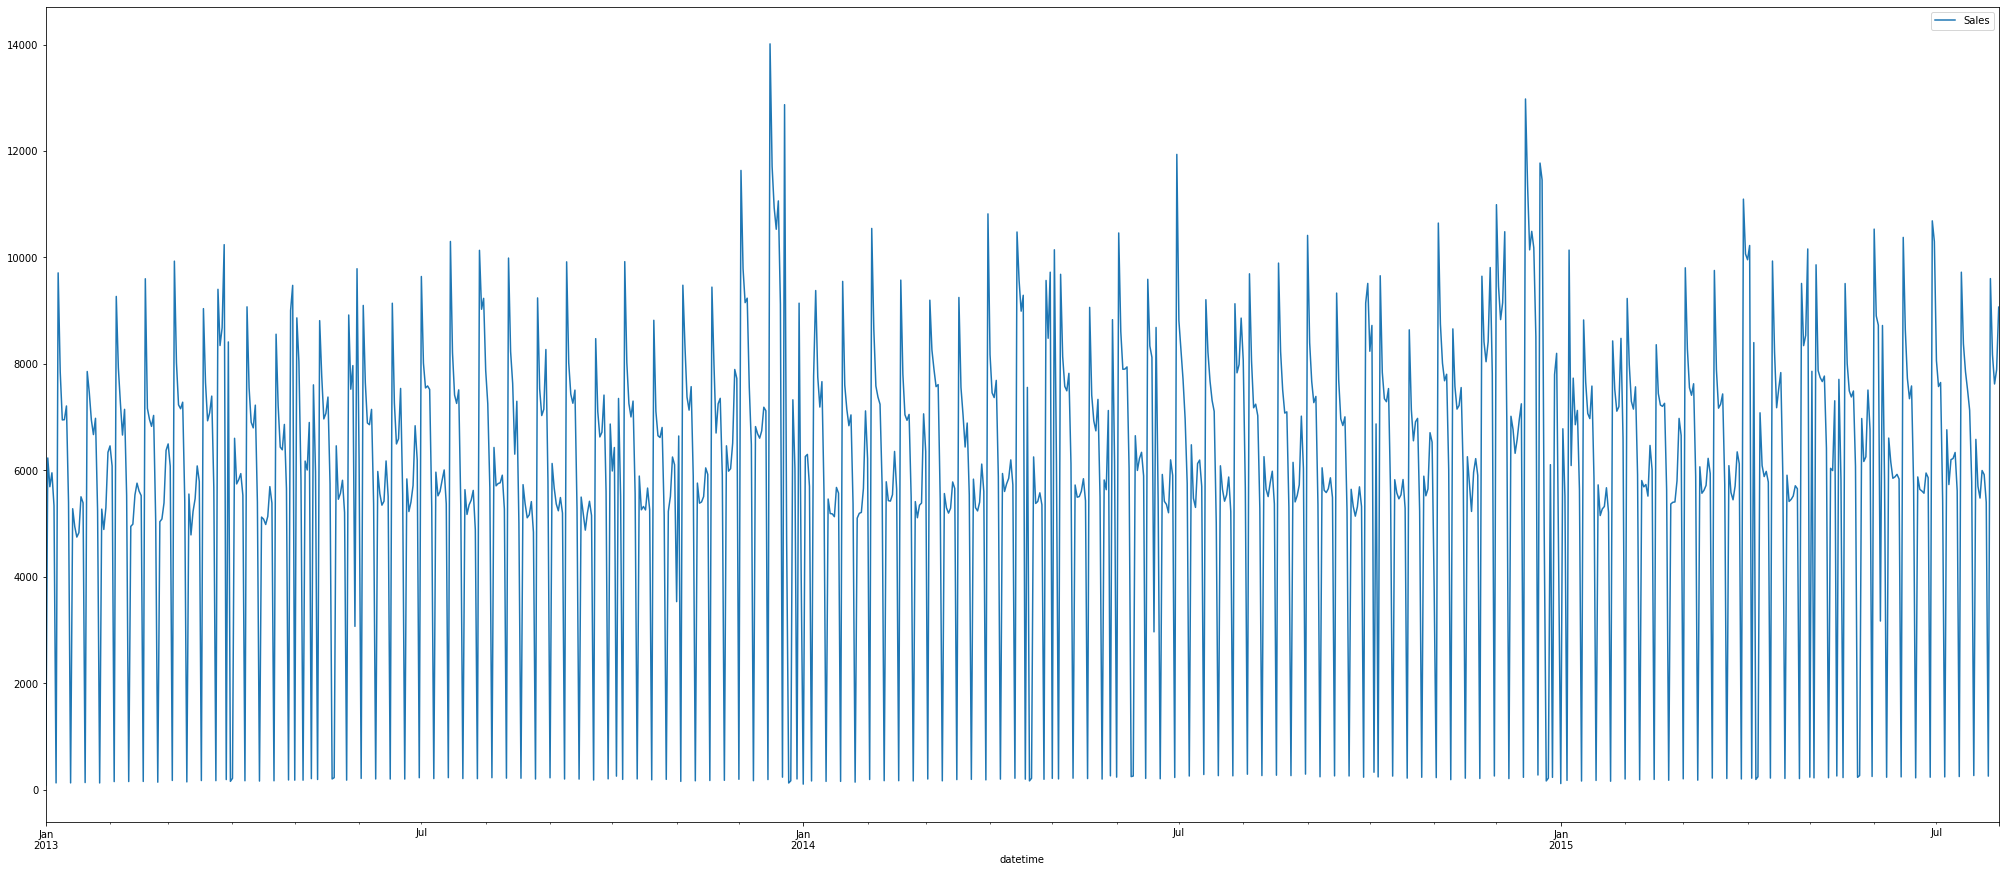

In [17]:
time_series_day = time_series.resample('D').mean()
time_series_day.plot(figsize=(35,15))
plt.show()

In [18]:
time_series_week = time_series.resample('W').mean()

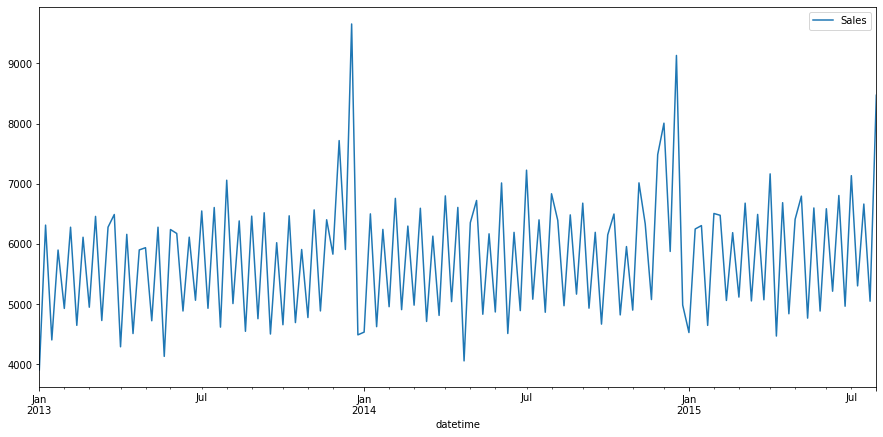

In [19]:
#plt.figure(figsize=(25,7))
time_series_week.plot(figsize=(15,7))
plt.show()

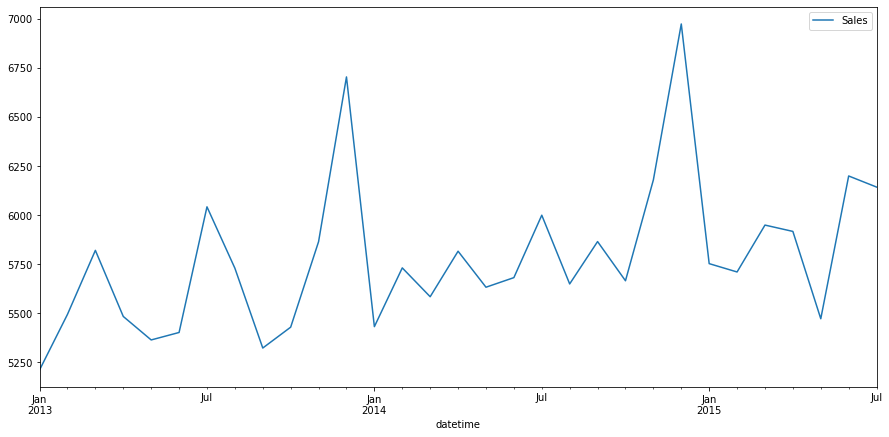

In [20]:
time_series_month = time_series.resample('M').mean()
time_series_month.plot(figsize=(15,7))
plt.show()